# Here is the link to RRP Analytics' Video Presentation on Customer Churn:

# 1.  Load all of the necessary libraries

In [291]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder


# 2. Load the Datasets

In [292]:
# Next we Loaded our dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Here we displayed the first few rows(little peek at our datasets)
print(train_data.head())
print(test_data.head())

# Again just gaining more basic information on the nature of our data
print(train_data.info())
print(test_data.describe())


     id  gender  senior_citizen partner dependents  tenure phone_service  \
0  1815    Male               0     Yes        Yes      12           Yes   
1  5947  Female               0      No         No      42           Yes   
2  3882    Male               0     Yes         No      71           Yes   
3  2390    Male               0     Yes        Yes      71           Yes   
4  3677    Male               0      No         No      30           Yes   

  multiple_lines internet_service      online_security  ...  \
0             No               No  No internet service  ...   
1             No              DSL                  Yes  ...   
2            Yes              DSL                  Yes  ...   
3            Yes              DSL                  Yes  ...   
4             No              DSL                  Yes  ...   

     device_protection         tech_support         streaming_tv  \
0  No internet service  No internet service  No internet service   
1                  Yes      

In [ ]:
print(train_data.columns)
print(test_data.columns)


Index(['id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'label'],
      dtype='object')
Index(['id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')


In [ ]:
print(train_data['contract'].unique())
print(test_data['contract'].unique())


['Two year' 'One year' 'Month-to-month']
['One year' 'Two year' 'Month-to-month']


# 3. Data Exploration

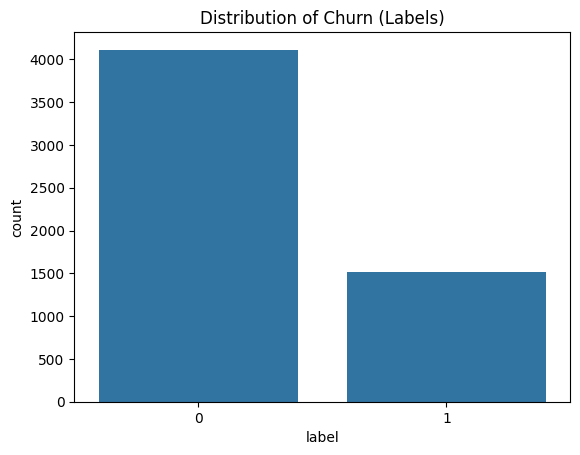

       senior_citizen       tenure  monthly_charges        label
count     5634.000000  5634.000000      5634.000000  5634.000000
mean         0.161874    32.277955        64.779127     0.269968
std          0.368368    24.555211        30.104993     0.443982
min          0.000000     0.000000        18.250000     0.000000
25%          0.000000     9.000000        35.400000     0.000000
50%          0.000000    29.000000        70.375000     0.000000
75%          0.000000    55.000000        89.850000     1.000000
max          1.000000    72.000000       118.650000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5634 non-null   object 
 1   senior_citizen     5634 non-null   int64  
 2   partner            5634 non-null   object 
 3   dependents         5634 non-null   object 
 4   tenure         

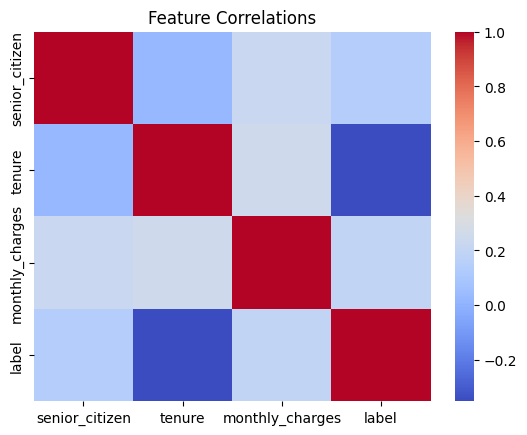

                 senior_citizen    tenure  monthly_charges     label
senior_citizen         1.000000  0.023443         0.225234  0.141966
tenure                 0.023443  1.000000         0.251072 -0.351885
monthly_charges        0.225234  0.251072         1.000000  0.196805
label                  0.141966 -0.351885         0.196805  1.000000


In [236]:
# Here we selected only the  numeric columns for correlation matrix calculation
numeric_data = train_data.select_dtypes(include=['number'])  # Select columns with numeric data types

# Here we just wanted to explore the distribution in the target
sns.countplot(x='label', data=train_data)
plt.title("Distribution of Churn (Labels)")
plt.show()

# Here we wanted to see an overall summary of the data
print(train_data.describe())
print(train_data.info())

# Here we calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()
print(correlation_matrix)





In [235]:
print(train_data.columns)

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'label'],
      dtype='object')


# 4. Data Preprocessing

In [293]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# First, we dropped the 'id' column and saved it for later
train_ids = train_data.pop('id')
test_ids = test_data.pop('id')

# Next we separated features and target
X = train_data.drop(columns=['label'])
y = train_data['label']
X_test = test_data

# Next we developed the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with mean
            ('scaler', StandardScaler())  # Scale numerical data
        ]), X.select_dtypes(exclude=['object']).columns),  # Automatically select numerical columns
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical missing values with most frequent
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding for categorical variables
        ]), X.select_dtypes(include=['object']).columns)  # Automatically select categorical columns
    ]
)

# Here we split the data 80% for training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Here we defined the complete pipeline that included both the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)  # Preprocessing steps for numerical and categorical data
])

# Finally we fit the pipeline
X_train_processed = pipeline.fit_transform(X_train)
X_val_processed = pipeline.transform(X_val)
X_test_processed = pipeline.transform(X_test)
























# Modeling Training

In [294]:
# Define the Perceptron classifier pipeline
pipeline = Pipeline([
    ('classifier', Perceptron(max_iter=1000, random_state=42))  # Add the Perceptron classifier
])

# Fit the Perceptron classifier to the processed training data
pipeline.fit(X_train_processed, y_train)

# Evaluate the classifier on the validation set
y_pred_val = pipeline.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')

print("Accuracy:", accuracy)
print("F1-score (macro):", f1)






Accuracy: 0.7737355811889973
F1-score (macro): 0.6858881664158232


In [296]:

# Define the Logistic Regression classifier pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression(
        penalty='l2',                  # L2 regularization
        solver='lbfgs',                # LBFGS solver
        max_iter=10000,                # Maximum iterations set to 10,000
        random_state=42))              # Set random state for reproducibility
])

# Fit the Logistic Regression classifier to the processed training data
pipeline.fit(X_train_processed, y_train)

# Evaluate the classifier on the validation set
y_pred_val = pipeline.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')

print("Accuracy:", accuracy)
print("F1-score (macro):", f1)





Accuracy: 0.8074534161490683
F1-score (macro): 0.7431191985992083


In [297]:

# Define the Random Forest classifier pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(
        n_estimators=100,          # Number of trees in the forest
        random_state=42,           # Set random state for reproducibility
        n_jobs=-1))                # Use all processors for training
])

# Fit the Random Forest classifier to the processed training data
pipeline.fit(X_train_processed, y_train)

# Evaluate the classifier on the validation set
y_pred_val = pipeline.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')

print("Accuracy:", accuracy)
print("F1-score (macro):", f1)




Accuracy: 0.7879325643300799
F1-score (macro): 0.7024752765065784


In [298]:

# Define the SVM classifier pipeline
pipeline = Pipeline([
    ('classifier', SVC(
        kernel='rbf',              # Radial Basis Function kernel
        C=1.0,                     # Regularization parameter
        gamma='scale',             # Kernel coefficient
        random_state=42))          # Set random state for reproducibility
])

# Fit the SVM classifier to the processed training data
pipeline.fit(X_train_processed, y_train)

# Evaluate the classifier on the validation set
y_pred_val = pipeline.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')

print("Accuracy:", accuracy)
print("F1-score (macro):", f1)





Accuracy: 0.7959183673469388
F1-score (macro): 0.7163135314976141


In [299]:

# Define the KNN classifier pipeline
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(
        n_neighbors=5,              # Number of neighbors to use
        algorithm='auto',           # Algorithm to compute the nearest neighbors (auto selects the best)
        n_jobs=-1))                 # Use all processors for training
])

# Fit the KNN classifier to the processed training data
pipeline.fit(X_train_processed, y_train)

# Evaluate the classifier on the validation set
y_pred_val = pipeline.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')

print("Accuracy:", accuracy)
print("F1-score (macro):", f1)





Accuracy: 0.7568766637089619
F1-score (macro): 0.6826670119535014


In [300]:

# Define the XGBoost classifier pipeline
pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',  # Binary classification objective
        eval_metric='logloss',        # Evaluation metric
        use_label_encoder=False,      # Prevent warning related to label encoding
        random_state=42,              # Set random state for reproducibility
        n_estimators=100,            # Number of boosting rounds
        max_depth=6,                 # Maximum depth of trees
        learning_rate=0.1,           # Learning rate (shrinkage)
        subsample=0.8,               # Subsample ratio of the training set
        colsample_bytree=0.8         # Subsample ratio of features for each tree
    ))
])

# Fit the XGBoost classifier to the processed training data
pipeline.fit(X_train_processed, y_train)

# Evaluate the classifier on the validation set
y_pred_val = pipeline.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')

print("Accuracy:", accuracy)
print("F1-score (macro):", f1)





/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:03:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7861579414374446
F1-score (macro): 0.7112569672344637


In [301]:

# Define the Decision Tree classifier pipeline
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(
        criterion='gini',             # Gini impurity for splitting nodes
        max_depth=5,                  # Maximum depth of the tree
        min_samples_split=10,         # Minimum samples required to split a node
        random_state=42))             # Set random state for reproducibility
])

# Fit the Decision Tree classifier to the processed training data
pipeline.fit(X_train_processed, y_train)

# Evaluate the classifier on the validation set
y_pred_val = pipeline.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')

print("Accuracy:", accuracy)
print("F1-score (macro):", f1)


Accuracy: 0.7923691215616682
F1-score (macro): 0.735935547438239


# 6. Training the best model

In [302]:

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training data
lr_pipeline.fit(X_train, y_train)

# Make predictions on the test data (unseen by the model)
y_pred_lr_test = lr_pipeline.predict(X_test)

# Evaluate the model using accuracy and F1-score on the test set
accuracy_test = accuracy_score(y_test, y_pred_lr_test)
f1_test = f1_score(y_test, y_pred_lr_test, average='macro')  # F1-macro for multi-class classification

# Print evaluation metrics
print("Logistic Regression Accuracy on Test Set:", accuracy_test)
print("Logistic Regression F1-Score (Macro) on Test Set:", f1_test)







Logistic Regression Accuracy on Test Set: 0.7701863354037267
Logistic Regression F1-Score (Macro) on Test Set: 0.6881634964130998


# Learning Curve

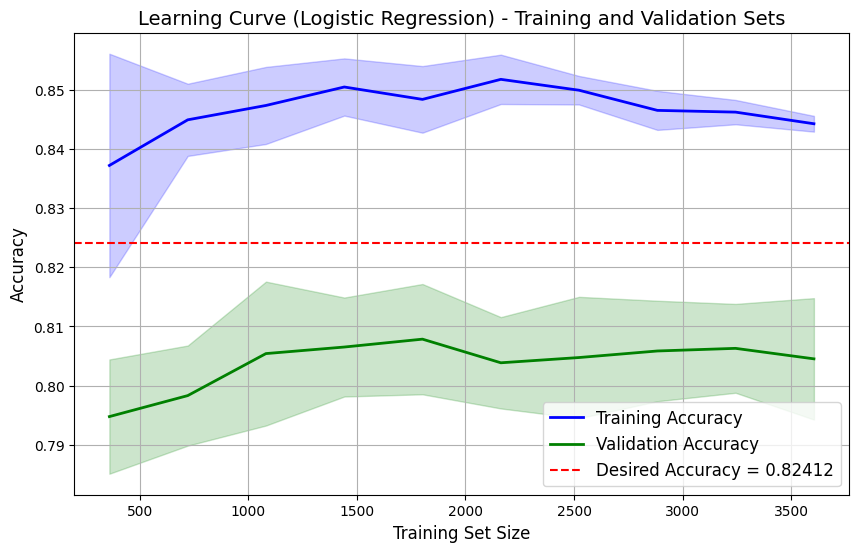

In [303]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get learning curve data (using training data for training and cross-validation)
train_sizes, train_scores, test_scores = learning_curve(
    lr_pipeline, X_train, y_train, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Calculate the mean and standard deviation of training and testing scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', linewidth=2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Plot the desired accuracy line
plt.axhline(y=0.82412, color='red', linestyle='--', label='Desired Accuracy = 0.82412')

# Add labels, title, and legend
plt.title('Learning Curve (Logistic Regression) - Training and Validation Sets', fontsize=14)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()




#. 8 Model Deployment

In [152]:

# Use the full pipeline (including preprocessing and classifier) to make predictions on the test data
y_test_predictions = lr_pipeline.predict(X_test)  # Predict using the trained pipeline on the test set

# Convert predictions to labels ('Yes' for 1, 'No' for 0)
churn_labels = ['Yes' if pred == 1 else 'No' for pred in y_test_predictions]

# Ensure the length of test_ids matches y_test_predictions (in case of any mismatch)
test_ids = test_ids[:len(y_test_predictions)]  # Slice test_ids to match length of predictions

# Create a submission DataFrame using 'test_ids' and 'churn_labels'
submission = pd.DataFrame({
    'id': test_ids,  # Using 'test_ids' from earlier preprocessing
    'label': churn_labels  # 'label' column will contain 'Yes' or 'No' based on predictions
})

# Save the submission file to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'.")








Submission file saved as 'submission.csv'.
